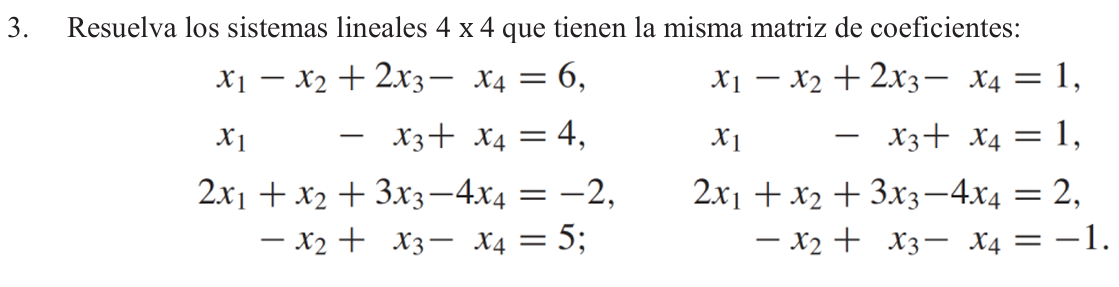

In [2]:
import numpy as np

# Definición de la matriz de coeficientes y vectores de términos independientes
A = np.array([
    [1, -1, 2, -1],
    [1, 0, -1, 1],
    [2, 1, 3, -4],
    [0, -1, 1, -1]
], dtype=float)

b1 = np.array([6, 4, -2, 5], dtype=float)
b2 = np.array([1, 1, 2, -1], dtype=float)

# Función para mostrar matrices aumentadas
def print_augmented_matrix(A, b, title):
    print(f"\n{title}")
    aug = np.column_stack((A, b))
    for row in aug:
        print(" ".join(f"{x:6.2f}" for x in row))

# Paso 1: Mostrar matrices originales
print_augmented_matrix(A, b1, "Sistema 1 - Matriz aumentada original:")
print_augmented_matrix(A, b2, "Sistema 2 - Matriz aumentada original:")

# Paso 2: Eliminación Gaussiana - Fase de eliminación hacia adelante
def gaussian_elimination(A, b):
    n = len(A)
    # Crear copias para no modificar las originales
    A_temp = A.copy()
    b_temp = b.copy()
    
    print("\nProceso de eliminación hacia adelante:")
    for col in range(n-1):
        print(f"\nPaso {col+1}: Haciendo pivote en fila {col+1}")
        # Pivoteo parcial (opcional, para estabilidad numérica)
        max_row = np.argmax(np.abs(A_temp[col:, col])) + col
        if max_row != col:
            A_temp[[col, max_row]] = A_temp[[max_row, col]]
            b_temp[[col, max_row]] = b_temp[[max_row, col]]
            print(f"Intercambiando fila {col+1} con fila {max_row+1}")
        
        # Eliminación
        for row in range(col+1, n):
            factor = A_temp[row, col] / A_temp[col, col]
            A_temp[row, col:] -= factor * A_temp[col, col:]
            b_temp[row] -= factor * b_temp[col]
            
            print(f"Fila {row+1} -= {factor:.2f} * Fila {col+1}")
            print_augmented_matrix(A_temp, b_temp, f"Matriz después de operación:")
    
    return A_temp, b_temp

# Aplicar eliminación gaussiana a ambos sistemas
A_ref1, b_ref1 = gaussian_elimination(A, b1)
A_ref2, b_ref2 = gaussian_elimination(A, b2)

# Paso 3: Sustitución hacia atrás
def back_substitution(U, b):
    n = len(U)
    x = np.zeros(n)
    
    print("\nProceso de sustitución hacia atrás:")
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
        print(f"x[{i+1}] = ({b[i]:.2f} - {np.dot(U[i, i+1:], x[i+1:]):.2f}) / {U[i, i]:.2f} = {x[i]:.2f}")
    
    return x

# Resolver ambos sistemas
print("\nResolviendo Sistema 1:")
x1 = back_substitution(A_ref1, b_ref1)

print("\nResolviendo Sistema 2:")
x2 = back_substitution(A_ref2, b_ref2)

# Paso 4: Verificación de soluciones
def verify_solution(A, b, x):
    print("\nVerificación de solución:")
    residual = b - np.dot(A, x)
    print(f"Residuo (b - Ax): {residual}")
    print(f"Norma del residuo: {np.linalg.norm(residual):.2e}")

print("\nVerificación para Sistema 1:")
verify_solution(A, b1, x1)

print("\nVerificación para Sistema 2:")
verify_solution(A, b2, x2)

# Resultados finales
print("\nRESULTADOS FINALES:")
print(f"Solución para Sistema 1: x1 = {x1[0]:.2f}, x2 = {x1[1]:.2f}, x3 = {x1[2]:.2f}, x4 = {x1[3]:.2f}")
print(f"Solución para Sistema 2: x1 = {x2[0]:.2f}, x2 = {x2[1]:.2f}, x3 = {x2[2]:.2f}, x4 = {x2[3]:.2f}")


Sistema 1 - Matriz aumentada original:
  1.00  -1.00   2.00  -1.00   6.00
  1.00   0.00  -1.00   1.00   4.00
  2.00   1.00   3.00  -4.00  -2.00
  0.00  -1.00   1.00  -1.00   5.00

Sistema 2 - Matriz aumentada original:
  1.00  -1.00   2.00  -1.00   1.00
  1.00   0.00  -1.00   1.00   1.00
  2.00   1.00   3.00  -4.00   2.00
  0.00  -1.00   1.00  -1.00  -1.00

Proceso de eliminación hacia adelante:

Paso 1: Haciendo pivote en fila 1
Intercambiando fila 1 con fila 3
Fila 2 -= 0.50 * Fila 1

Matriz después de operación:
  2.00   1.00   3.00  -4.00  -2.00
  0.00  -0.50  -2.50   3.00   5.00
  1.00  -1.00   2.00  -1.00   6.00
  0.00  -1.00   1.00  -1.00   5.00
Fila 3 -= 0.50 * Fila 1

Matriz después de operación:
  2.00   1.00   3.00  -4.00  -2.00
  0.00  -0.50  -2.50   3.00   5.00
  0.00  -1.50   0.50   1.00   7.00
  0.00  -1.00   1.00  -1.00   5.00
Fila 4 -= 0.00 * Fila 1

Matriz después de operación:
  2.00   1.00   3.00  -4.00  -2.00
  0.00  -0.50  -2.50   3.00   5.00
  0.00  -1.50   0.50